In [1]:
#this notebook runs the PYQG layered model based on the A20 section from 2011
# http://whp-atlas.ucsd.edu/atlantic/a20/sections/printatlas/printatlas.htm


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pyqg

In [3]:
#now to try to run the three layer model(proper PYQG)
from pyqg import diagnostic_tools as tools
#this sets up the layers
L =  1000.e3     # length scale of box    [m]
Ld = 15.e3       # deformation scale      [m]
kd = 1./Ld       # deformation wavenumber [m^-1]
Nx = 128         # number of grid points

H1 = 200.        # layer 1 thickness  [m]
H2 = 1300.       # layer 2
H3 = 3500.       # layer 3

U1 = 0.05          # layer 1 zonal velocity [m/s]
U2 = 0.025         # layer 2
U3 = 0.00          # layer 3

rho1 = 1025.
rho2 = 1027.5
rho3 = 1028.

rek = 1.e-7       # linear bottom drag coeff.  [s^-1]
f0  = 0.0001236812857687059 # coriolis param [s^-1]
beta = 1.2130692965249345e-11 # planetary vorticity gradient [m^-1 s^-1]

Ti = Ld/(abs(U1))  # estimate of most unstable e-folding time scale [s]
dt = Ti/400.   # time-step [s]
tmax = 300*Ti      # simulation time [s]


In [4]:
#this defines the model from all of the set-up parameters above
m = pyqg.LayeredModel(nx=Nx, nz=3, U = [U1,U2,U3],V = [0.,0.,0.],L=L,f=f0,beta=beta,
                         H = [H1,H2,H3], rho=[rho1,rho2,rho3],rek=rek,
                        dt=dt,tmax=tmax, twrite=5000, tavestart=Ti*10)

INFO:  Logger initialized


In [5]:
#this sets up the initial conditions for the model
#in the original code, delta is not specified 
#delta = 0.5
sig = 1.e-7
qi = sig*np.vstack([np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,]])
m.set_q(qi)

In [6]:
#now, we run the model 
m.run()

INFO: Step: 5000, Time: 3.75e+06, KE: 1.31e-07, CFL: 0.005
INFO: Step: 10000, Time: 7.50e+06, KE: 1.80e-07, CFL: 0.005
INFO: Step: 15000, Time: 1.12e+07, KE: 3.48e-07, CFL: 0.005
INFO: Step: 20000, Time: 1.50e+07, KE: 8.52e-07, CFL: 0.005
INFO: Step: 25000, Time: 1.88e+07, KE: 2.41e-06, CFL: 0.005
INFO: Step: 30000, Time: 2.25e+07, KE: 7.31e-06, CFL: 0.006
INFO: Step: 35000, Time: 2.62e+07, KE: 2.30e-05, CFL: 0.007
INFO: Step: 40000, Time: 3.00e+07, KE: 7.28e-05, CFL: 0.008
INFO: Step: 70000, Time: 5.25e+07, KE: 2.02e-03, CFL: 0.036
INFO: Step: 75000, Time: 5.62e+07, KE: 2.19e-03, CFL: 0.033
INFO: Step: 80000, Time: 6.00e+07, KE: 2.27e-03, CFL: 0.037
INFO: Step: 85000, Time: 6.38e+07, KE: 2.44e-03, CFL: 0.037
INFO: Step: 90000, Time: 6.75e+07, KE: 2.53e-03, CFL: 0.043
INFO: Step: 95000, Time: 7.12e+07, KE: 2.65e-03, CFL: 0.042
INFO: Step: 100000, Time: 7.50e+07, KE: 2.68e-03, CFL: 0.040
INFO: Step: 105000, Time: 7.88e+07, KE: 2.82e-03, CFL: 0.036
INFO: Step: 110000, Time: 8.25e+07, KE:

/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """
/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':
/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either

Text(0.5, 1.0, 'Layer 3 PV')

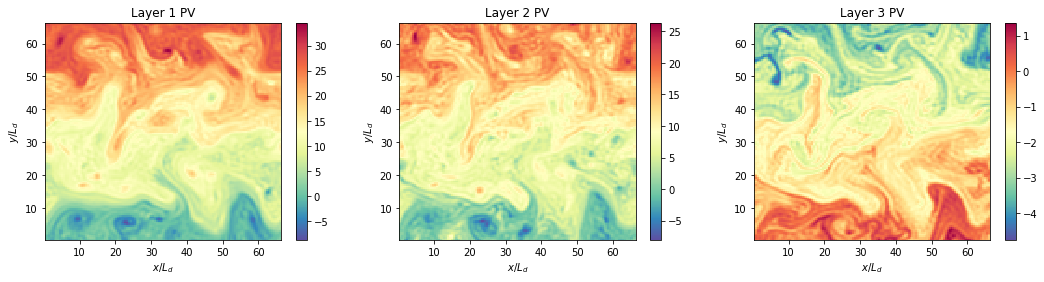

In [7]:
#now this visualizes the results
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[0,]+m.Qy[0]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 1 PV')

plt.subplot(132)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[1,]+m.Qy[1]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 2 PV')

plt.subplot(133)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[2,]+m.Qy[2]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 3 PV')

/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


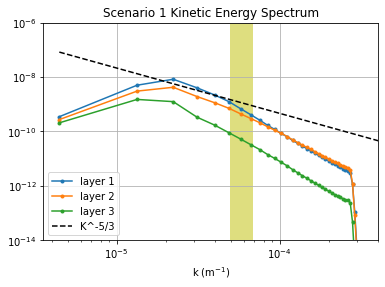

In [8]:
kr, kespec_1 = tools.calc_ispec(m,m.get_diagnostic('KEspec')[0])
_, kespec_2 = tools.calc_ispec(m,m.get_diagnostic('KEspec')[1])
_, kespec_3 = tools.calc_ispec(m,m.get_diagnostic('KEspec')[2])

plt.loglog( kr, kespec_1, '.-' )
plt.loglog( kr, kespec_2, '.-' )
plt.loglog( kr, kespec_3, '.-' )
y = 1e-16 * kr**(-5/3) 
plt.loglog( kr, y, '--k',label ="k^-5/3")
#the two lines above are meant to add a line: y = k^(-5/3) + 10^(-8)

plt.legend(['layer 1','layer 2', 'layer 3','K^-5/3'], loc='lower left')
plt.ylim([1e-14,1e-6]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Scenario 1 Kinetic Energy Spectrum');

#the lines below will try to add a shaded section indicating where the rossby radius of deformation is
#to do this, we need to change the radii to wavenumbers 
radiiwavenumbers = 1/(m.radii)
a = radiiwavenumbers[2]
b = radiiwavenumbers[1]
plt.axvspan(a, b, color='y', alpha=0.5, lw=0)
plt.savefig('shade.png', dpi=300)
plt.show()

In [9]:
m.describe_diagnostics()

NAME               | DESCRIPTION
--------------------------------------------------------------------------------
APEflux    | spectral divergence of flux of available potential energy
APEgenspec | the spectrum of the rate of generation of available potential energy
APEspec    | available potential energy spectrum                   
EKE        | mean eddy kinetic energy                              
EKEdiss    | total energy dissipation by bottom drag               
ENSflux    | barotropic enstrophy flux                             
ENSgenspec | the spectrum of the rate of generation of barotropic enstrophy
Ensspec    | enstrophy spectrum                                    
KEflux     | spectral divergence of flux of kinetic energy         
KEspec     |  kinetic energy spectrum                              
KEspec_modal | modal KE spectra                                      
PEspec_modal | modal PE spectra                                      
entspec    | barotropic enstrophy spectru